# IoT Equipment Failure Prediction using Sensor data

In [59]:
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import itertools
from itertools import product
from sklearn.metrics import confusion_matrix
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Data

In [14]:
data = pd.read_csv('iot_sensor_dataset.csv')
data.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [15]:
X = data.iloc[:,:9]
y = data.iloc[:,9]
# normalize the data attributes
#normalized_X = preprocessing.normalize(X)
#standardized_X = preprocessing.scale(normalized_X)


In [16]:
#X = standardized_X
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.33, random_state=0)

In [18]:
list(test_y).count(1)

132

In [19]:
list(test_y).count(0)

180

# Confusion_matrix

In [20]:
def confusion_matrix_(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.3
0.10.0


# ExtraTreesClassifier

Feature ranking:
1. feature 5 (0.467339)
2. feature 2 (0.166052)
3. feature 3 (0.118038)
4. feature 4 (0.062844)
5. feature 8 (0.043691)
6. feature 0 (0.042401)
7. feature 6 (0.037795)
8. feature 7 (0.031798)
9. feature 1 (0.030041)


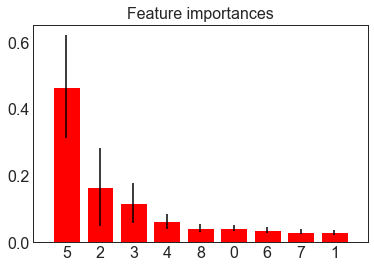

[0.04240099 0.03004099 0.16605247 0.11803829 0.06284406 0.46733893
 0.03779531 0.03179821 0.04369075]


In [23]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
print(forest.feature_importances_)

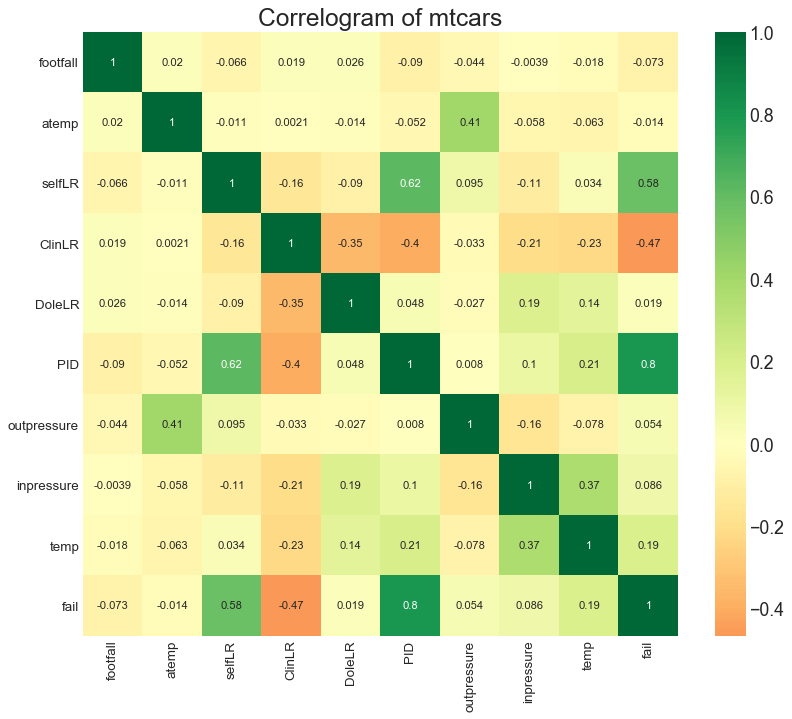

In [24]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

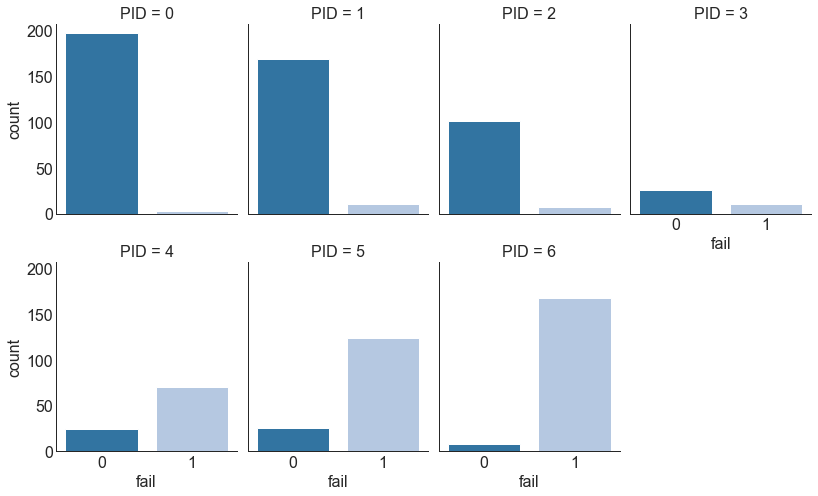

In [25]:
# Load Dataset

# Plot
g = sns.catplot("fail", col="PID", col_wrap=4,data=data[data.PID.notnull()],kind="count", height=3.5, aspect=.8, palette='tab20')

fig.suptitle('sf')
plt.show()

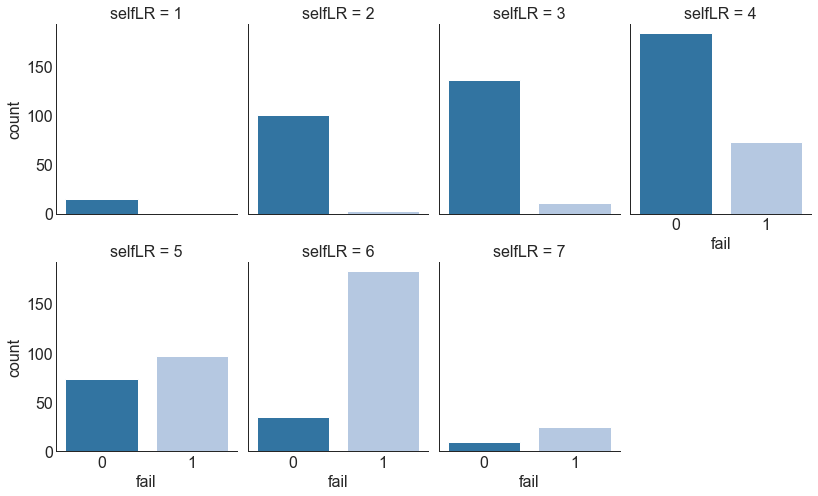

In [26]:
# Load Dataset

# Plot
g = sns.catplot("fail", col="selfLR", col_wrap=4,data=data[data.selfLR.notnull()],kind="count", height=3.5, aspect=.8, palette='tab20')

fig.suptitle('sf')
plt.show()

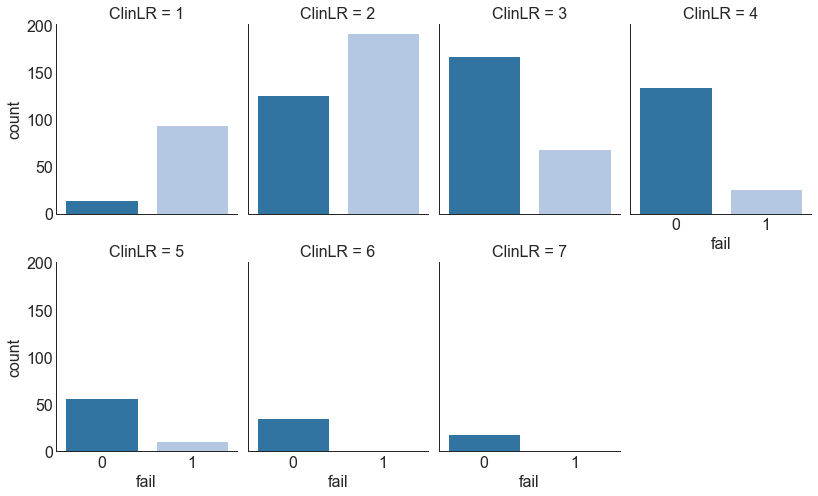

In [27]:
# Load Dataset

# Plot\

g = sns.catplot("fail", col="ClinLR", col_wrap=4,data=data[data.ClinLR.notnull()],kind="count", height=3.5, aspect=.8, palette='tab20')

fig.suptitle('sf')
plt.show()

# http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

# LogisticRegression

In [184]:
import time
start_time = time.time()
model = LogisticRegression(random_state=0, solver='lbfgs')
efs1 = EFS(model, 
           min_features=1,
           max_features=9,
           scoring='f1',
           print_progress=True)

efs1 = efs1.fit(train_x, train_y)
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)
print("--- %s seconds ---" % (time.time() - start_time))

Features: 511/511

Best accuracy score: 0.89
Best subset (indices): (1, 3, 4, 5)
Best subset (corresponding names): ('1', '3', '4', '5')
--- 22.737483978271484 seconds ---


In [165]:
import time
start_time = time.time()
X_train_efs = efs1.transform(train_x)
X_test_efs = efs1.transform(test_x)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(X_train_efs, train_y)
y_pred_l = model.predict(X_test_efs)
confusion_matrix_(test_y.values,y_pred_l)
print("--- %s seconds ---" % (time.time() - start_time))

Actual, Predicted Observations:   312 312
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       167            13
Actual Y       15            117
--------------------------------------------
Total observations  :   312
False Positives     :   13
False Negatives     :   15
Overall Accuracy    :   91.03 %
Sensitivity/Recall  :   88.64 %
Specificity         :   92.78 %
Precision           :   90.0 %
--------------------------------------------
--- 0.012980222702026367 seconds ---


Confusion matrix, without normalization
[[167  13]
 [ 15 117]]


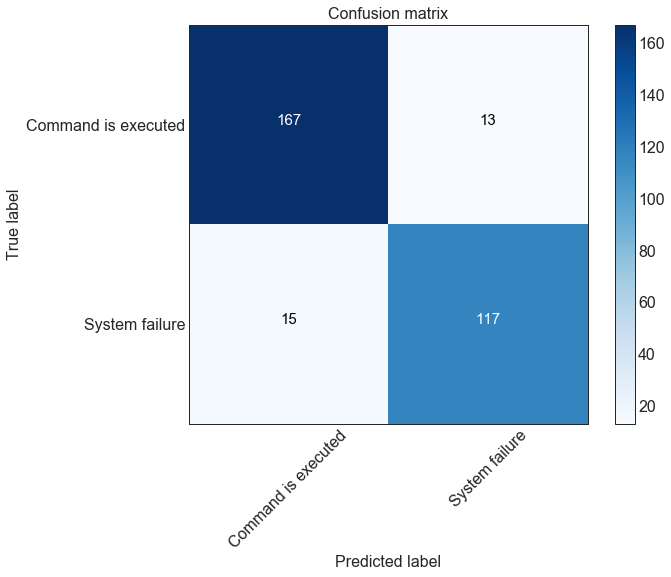

In [166]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(test_y.values,y_pred_l)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Сommand is executed', 'System failure'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

#  LinearDiscriminantAnalysis()

In [167]:
import time
start_time = time.time()
model = LinearDiscriminantAnalysis()
efs2 = EFS(model, 
           min_features=1,
           max_features=9,
           scoring='f1',
           print_progress=True)

efs2 = efs2.fit(train_x, train_y)
print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)
print("--- %s seconds ---" % (time.time() - start_time))

Features: 511/511

Best accuracy score: 0.89
Best subset (indices): (0, 1, 2, 3, 4, 5, 7)
Best subset (corresponding names): ('0', '1', '2', '3', '4', '5', '7')
--- 9.391631126403809 seconds ---


In [168]:
import time
start_time = time.time()
X_train_efs = efs2.transform(train_x)
X_test_efs = efs2.transform(test_x)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(X_train_efs, train_y)
y_pred_tr = model.predict(X_test_efs)

confusion_matrix_(test_y.values,y_pred_tr)
print("--- %s seconds ---" % (time.time() - start_time))

Actual, Predicted Observations:   312 312
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       168            12
Actual Y       13            119
--------------------------------------------
Total observations  :   312
False Positives     :   12
False Negatives     :   13
Overall Accuracy    :   91.99 %
Sensitivity/Recall  :   90.15 %
Specificity         :   93.33 %
Precision           :   90.84 %
--------------------------------------------
--- 0.008710145950317383 seconds ---


Confusion matrix, without normalization
[[168  12]
 [ 13 119]]


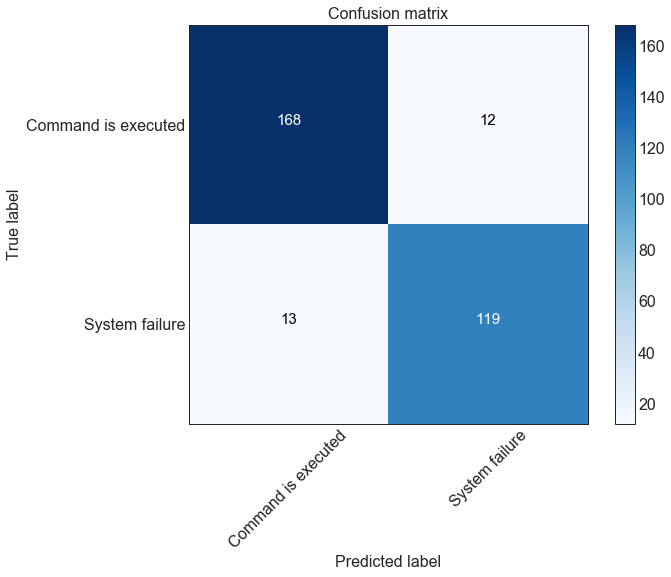

In [169]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(test_y.values,y_pred_tr)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Сommand is executed', 'System failure'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

# svm.SVC

In [170]:
import time
start_time = time.time()
model = SVC()
efs1 = EFS(model, 
           min_features=1,
           max_features=9,
           scoring='accuracy',
           print_progress=True)

efs1 = efs1.fit(train_x, train_y)
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)
print("--- %s seconds ---" % (time.time() - start_time))

Features: 511/511

Best accuracy score: 0.91
Best subset (indices): (1, 3, 4, 5)
Best subset (corresponding names): ('1', '3', '4', '5')
--- 17.00426483154297 seconds ---


In [171]:
import time
start_time = time.time()
X_train_efs = efs1.transform(train_x)
X_test_efs = efs1.transform(test_x)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(X_train_efs, train_y)
y_pred_sv = model.predict(X_test_efs)
confusion_matrix_(test_y.values,y_pred_sv)
print("--- %s seconds ---" % (time.time() - start_time))

Actual, Predicted Observations:   312 312
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       169            11
Actual Y       13            119
--------------------------------------------
Total observations  :   312
False Positives     :   11
False Negatives     :   13
Overall Accuracy    :   92.31 %
Sensitivity/Recall  :   90.15 %
Specificity         :   93.89 %
Precision           :   91.54 %
--------------------------------------------
--- 0.013100862503051758 seconds ---


Confusion matrix, without normalization
[[169  11]
 [ 13 119]]


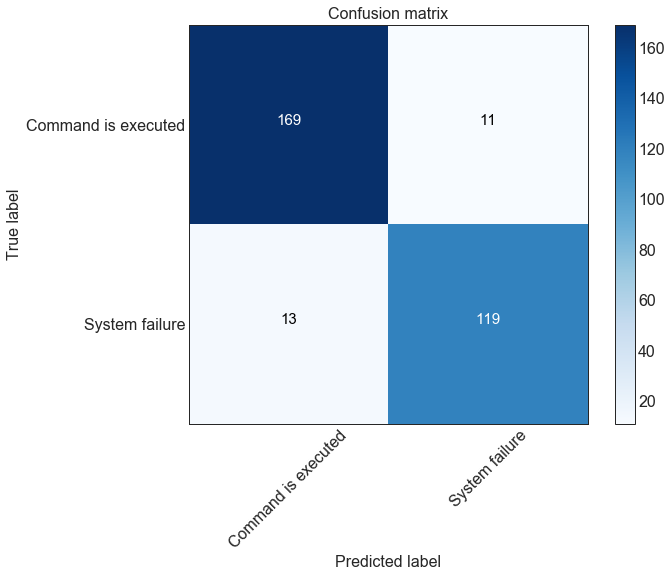

In [172]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(test_y.values,y_pred_sv)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Сommand is executed', 'System failure'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

# GaussianNB()

In [173]:
import time
start_time = time.time()
model =  GaussianNB()
efs1 = EFS(model, 
           min_features=1,
           max_features=9,
           scoring='accuracy',
           print_progress=True)

efs1 = efs1.fit(train_x, train_y)
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)
print("--- %s seconds ---" % (time.time() - start_time))

Features: 511/511

Best accuracy score: 0.91
Best subset (indices): (1, 2, 3, 5, 8)
Best subset (corresponding names): ('1', '2', '3', '5', '8')
--- 5.6351988315582275 seconds ---


In [174]:
import time
start_time = time.time()
X_train_efs = efs1.transform(train_x)
X_test_efs = efs1.transform(test_x)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
model.fit(X_train_efs, train_y)
y_pred_k = model.predict(X_test_efs)
confusion_matrix_(test_y.values,y_pred_k)
print("--- %s seconds ---" % (time.time() - start_time))

Actual, Predicted Observations:   312 312
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       167            13
Actual Y       12            120
--------------------------------------------
Total observations  :   312
False Positives     :   13
False Negatives     :   12
Overall Accuracy    :   91.99 %
Sensitivity/Recall  :   90.91 %
Specificity         :   92.78 %
Precision           :   90.23 %
--------------------------------------------
--- 0.0077130794525146484 seconds ---


Confusion matrix, without normalization
[[167  13]
 [ 12 120]]


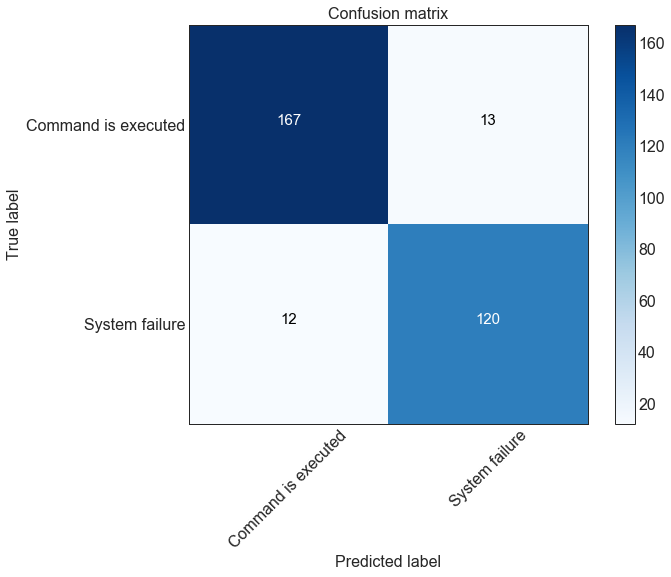

In [175]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(test_y.values,y_pred_k)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Сommand is executed', 'System failure'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

# Receiver Operating Characteristic (ROC)

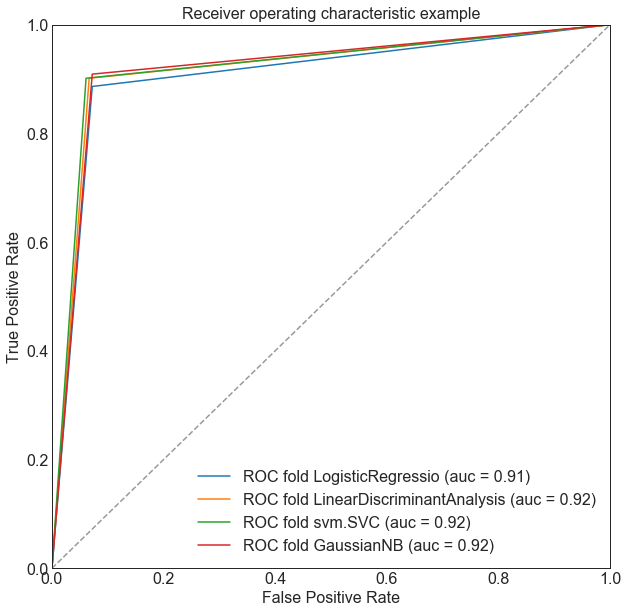

In [177]:
import metrics
plt.figure(figsize=(10, 10)) 
fpr, tpr, thresholds = roc_curve(test_y.values,y_pred_l)
roc_auc = ml_metrics.auc(test_y.values,y_pred_l)
md = str('LogisticRegression')
md = md[:md.find('(')]
pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
fpr, tpr, thresholds = roc_curve(test_y.values,y_pred_tr)
roc_auc = ml_metrics.auc(test_y.values,y_pred_tr)
md = str('LinearDiscriminantAnalysis')
pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
fpr, tpr, thresholds = roc_curve(test_y.values,y_pred_sv)
roc_auc = ml_metrics.auc(test_y.values,y_pred_sv)
md = str('svm.SVC')
pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
fpr, tpr, thresholds = roc_curve(test_y.values,y_pred_k)
roc_auc = ml_metrics.auc(test_y.values,y_pred_k)
md = str('GaussianNB')
pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

LR: 0.909888 (0.023554)
LDA: 0.909899 (0.024057)
CART: 0.782094 (0.172843)
SVM: 0.914110 (0.027233)
NB: 0.908791 (0.034473)
KNN: 0.899272 (0.029973)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 10000x5000 with 0 Axes>

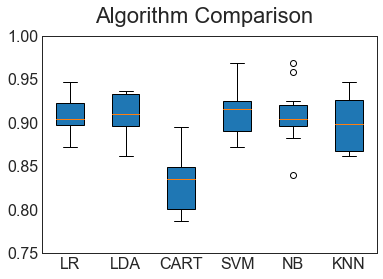

In [183]:
# prepare configuration for cross validation test harness
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import decomposition
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
plt.figure(figsize=(100,50), dpi= 100)

pos = np.array(range(len(results))) + 1
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,patch_artist=True,vert=1)
ax.set_xticklabels(names)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylim(0.75, 1)
plt.show()